**Suppose you have an on-line shope and you want to know how into how many types of boxes you need to order for the products on the platform**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("/content/olist_products_dataset.csv")
data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
data.shape

(32951, 9)

In [4]:
data.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data["product_category_name"].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [8]:
#convert product categories into numerical data
_, data['product_category_name'] = np.unique(data['product_category_name'], return_inverse=True)

In [9]:
data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,62,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,3,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,32,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,9,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,72,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
data["product_category_name"].value_counts()

13    3029
32    2867
54    2657
11    2444
72    2335
      ... 
37       5
15       5
60       3
67       2
17       1
Name: product_category_name, Length: 73, dtype: int64

In [11]:
data.columns.get_loc("product_weight_g")

5

In [12]:
#physical features: length x height x width
X = data.iloc[:, 6:].values

In [13]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

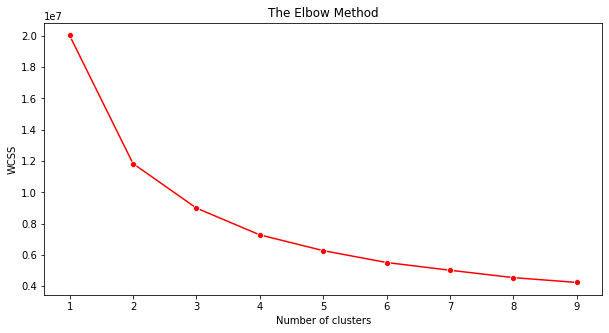

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# elbow - 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [16]:
#X scaling
X_scaled = StandardScaler().fit_transform(X)

In [17]:
X_PCA = PCA(n_components=3).fit_transform(X_scaled)

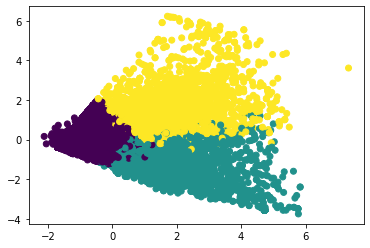

In [18]:
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=y_kmeans,cmap="viridis")

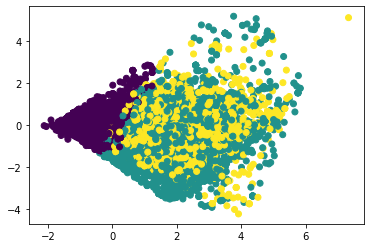

In [19]:
plt.scatter(X_PCA[:,0],X_PCA[:,2],c=y_kmeans,cmap="viridis")

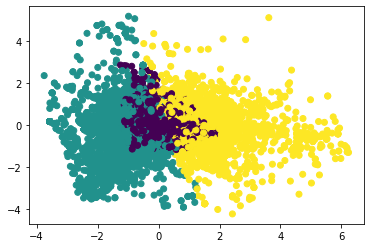

In [20]:
plt.scatter(X_PCA[:,1],X_PCA[:,2],c=y_kmeans,cmap="viridis")

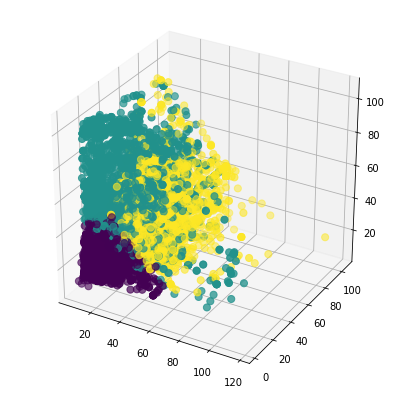

In [21]:
plt.figure('K-Means', figsize=(7,7))
ax = plt.axes(projection = '3d')
ax.scatter(X[:,2],X[:,1],X[:,0], c=y_kmeans , cmap="viridis", s=50)

In [22]:
data_phys = data.drop(data.columns[:6], axis=1)

In [23]:
data_phys.head()

,product_length_cm,product_height_cm,product_width_cm
0,16.0,10.0,14.0
1,30.0,18.0,20.0
2,18.0,9.0,15.0
3,26.0,4.0,26.0
4,20.0,17.0,13.0


In [24]:

data_phys["CLUSTER"]=y_kmeans
data_grouped =  data_phys.groupby("CLUSTER").mean()

In [25]:
data_phys["CLUSTER"].value_counts()

0    21238
1     6526
2     4576
Name: CLUSTER, dtype: int64

In [26]:
data_phys.head()

,product_length_cm,product_height_cm,product_width_cm,CLUSTER
0,16.0,10.0,14.0,0
1,30.0,18.0,20.0,0
2,18.0,9.0,15.0,0
3,26.0,4.0,26.0,0
4,20.0,17.0,13.0,0


In [46]:
data_phys[data_phys["CLUSTER"]== 0].describe()


,product_length_cm,product_height_cm,product_width_cm,CLUSTER
count,21238.000000,21238.000000,21238.000000,21238.0
mean,22.178642,12.253414,17.661880,0.0
std,6.425094,6.819911,5.893304,0.0
min,7.000000,2.000000,6.000000,0.0
25%,17.000000,7.000000,13.000000,0.0
50%,20.000000,11.000000,16.000000,0.0
75%,26.000000,16.000000,20.000000,0.0
max,46.000000,39.000000,60.000000,0.0


In [47]:
data_phys[data_phys["CLUSTER"]== 1].describe()

,product_length_cm,product_height_cm,product_width_cm,CLUSTER
count,6526.00000,6526.000000,6526.000000,6526.0
mean,55.52559,14.600981,35.201502,1.0
std,17.29922,8.503224,14.797919,0.0
min,16.00000,2.000000,10.000000,1.0
25%,43.00000,8.000000,27.000000,1.0
50%,50.00000,14.000000,35.000000,1.0
75%,64.00000,20.000000,42.000000,1.0
max,105.00000,66.000000,105.000000,1.0


In [48]:
data_phys[data_phys["CLUSTER"]== 2].describe()

,product_length_cm,product_height_cm,product_width_cm,CLUSTER
count,4576.000000,4576.000000,4576.000000,4576.0
mean,35.936626,42.159965,31.848339,2.0
std,13.051438,15.792153,11.623518,0.0
min,12.000000,15.000000,11.000000,2.0
25%,29.000000,30.000000,25.000000,2.0
50%,34.000000,38.000000,30.000000,2.0
75%,41.000000,50.000000,38.000000,2.0
max,105.000000,105.000000,118.000000,2.0
